**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`

###  Alumnos: 
    Asmat Córdova Fernando José
    Gonzales Leiva Diego André
    Herrera Hurtado Jose Ernesto
    
### Práctica: MNIST in Keras


### 1. ANN MNIST


In [1]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers
import keras

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import to_categorical              # NumPy related tools

#### Division de base de datos

In [2]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


#### Aplanamiento y normalizacion de las imagenes

In [3]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


#### Convirtiendo salidas a formato onehot

In [4]:
nb_classes = 10 # number of unique digits

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)
Y_train
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#### Construyendo la red neuronal

In [5]:
model = Sequential()

model.add(Dense(256, input_shape=(784,))) #(784,) is not a typo -- that represents a 784 length vector!
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               

#### Compilacion del modelo

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

#### Entrenando el modelo

In [11]:
history = model.fit(X_train, Y_train,
          batch_size=128,
          epochs=15,
          verbose=1,
          validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 4s 8ms/step - loss: 0.4205 - accuracy: 0.8712 - val_loss: 0.1224 - val_accuracy: 0.9643
Epoch 2/15
422/422 [==============================] - 3s 7ms/step - loss: 0.2020 - accuracy: 0.9431 - val_loss: 0.0937 - val_accuracy: 0.9728
Epoch 3/15
422/422 [==============================] - 3s 7ms/step - loss: 0.1614 - accuracy: 0.9559 - val_loss: 0.0827 - val_accuracy: 0.9765
Epoch 4/15
422/422 [==============================] - 3s 7ms/step - loss: 0.1336 - accuracy: 0.9623 - val_loss: 0.0831 - val_accuracy: 0.9757
Epoch 5/15
422/422 [==============================] - 3s 7ms/step - loss: 0.1170 - accuracy: 0.9661 - val_loss: 0.0745 - val_accuracy: 0.9787
Epoch 6/15
422/422 [==============================] - 3s 6ms/step - loss: 0.1055 - accuracy: 0.9704 - val_loss: 0.0701 - val_accuracy: 0.9802
Epoch 7/15
422/422 [==============================] - 3s 7ms/step - loss: 0.0946 - accuracy: 0.9741 - val_loss: 0.0642 - val_accuracy: 0.9813
Epoch 

#### Graficas del entrenamiento

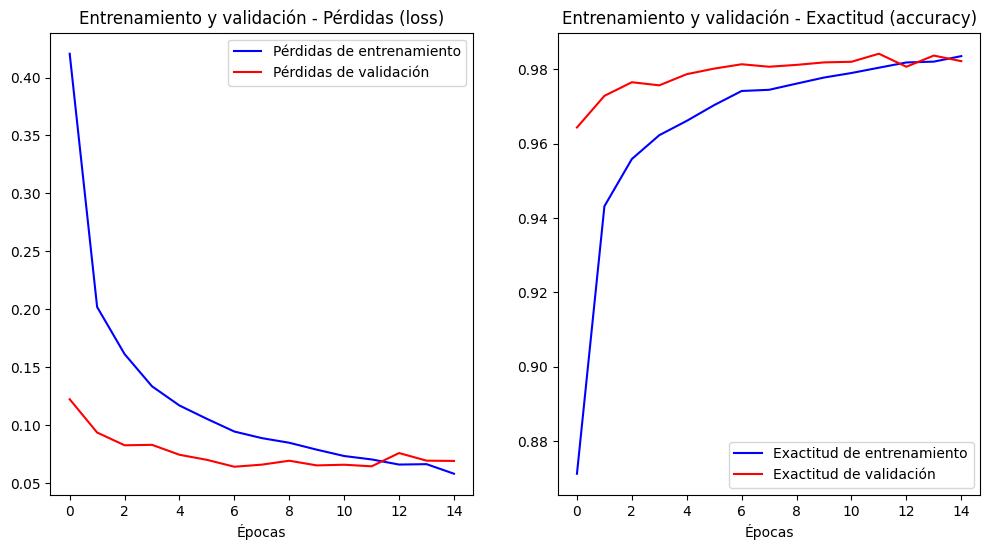

In [12]:
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
epochs = range(len(loss))

f, axarr = plt.subplots(1, 2, figsize=(12, 6))
p0 = axarr[0]
p1 = axarr[1]

p0.set_title("Entrenamiento y validación - Pérdidas (loss)")
p0.set_xlabel('Épocas')
p1.set_title("Entrenamiento y validación - Exactitud (accuracy)")
p1.set_xlabel('Épocas')

p0l0 = p0.plot(epochs, loss, "-b", label="Pérdidas de entrenamiento")
p0l1 = p0.plot( epochs, val_loss, "-r", label="Pérdidas de validación")

p1l0 = p1.plot(epochs, acc, "-b", label="Exactitud de entrenamiento")
p1l1 = p1.plot(epochs, val_acc, "-r", label="Exactitud de validación")

legend0 = p0.legend()
legend1 = p1.legend()

#### Precisión sobre la data de testeo

In [13]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0849 - accuracy: 0.9792
Test score: 0.08489862084388733
Test accuracy: 0.979200005531311


### 2.  TABLA DE HIPERPARAMETROS


In [24]:
import pandas as pd
data = pd.read_table("tabla.txt", header=None, names=["Epocas", "Capas", "Neuronas", "Dropout", "Funcn act", "Funcn optm", "Lrng rate", "Accuracy"])
# Ajustar el ancho de las columnas
print(data)

    Epocas  Capas  Neuronas  Dropout Funcn act Funcn optm  Lrng rate  Accuracy
1        5      2       512      0.2      ReLu       Adam      0.001  98.1299%
2       10      3       512      0.2      ReLu       Adam      0.010  96.2800%
3       10      3       512      0.2      ReLu       Adam      0.001  97.2500%
4       10      3       512      0.4      ReLu       Adam      0.001  98.2700%
5       15      3       512      0.4   Sigmoid       Adam      0.001  98.3900%
6       15      3       512      0.4   Sigmoid        SGD      0.001  98.3900%
7       15      3       512      0.4      Tanh       Adam      0.001  59.5200%
8       15      5       256      0.3      Tanh        SGD      0.001  88.9900%
9       15      5       256      0.3      ReLu        SGD      0.001  68.3100%
10      15      5       256      0.3      ReLu       Adam      0.001  97.9200%


### 3. OBSERVACIONES SOBRE AJUSTE DE  HIPERMARAMETROS


1. En el segundo ajuste, al incrementar la tasa de aprendizaje de 0.001 a 0.01, no se observa un progreso evidente en el aprendizaje. Esto se refleja en la imagen donde los valores de pérdida y precisión no presentan variaciones significativas a lo largo de todas las épocas, desde la primera hasta la última. Este estancamiento indica que el aumento en la tasa de aprendizaje no ha contribuido de manera positiva al rendimiento del modelo, sugiriendo la necesidad de considerar otros ajustes.

![](dos.PNG)

2. En el quinto ajuste, al emplear la función de activación sigmoide y aumentar el número de épocas a 15, se evidenció un pequeño fenómeno de sobreajuste en los resultados de la gráfica. Se observa que los valores de pérdida y precisión mejoran de manera más significativa para los datos de entrenamiento en comparación con los datos de validación.

![](cinco.PNG)

3. En el séptimo ajuste, se exploró el uso de la función de activación tangente hiperbólica (tanh) en conjunto con el optimizador Adam. Sin embargo, los resultados obtenidos no fueron favorables, como se evidencia en la gráfica de entrenamiento. La precisión alcanzada durante el entrenamiento se sitúa alrededor de 0.6, mientras que en el conjunto de prueba es de aproximadamente 0.59. Estos valores sugieren que la combinación de tanh y Adam puede no ser adecuada para este escenario específico.

![](siete.PNG)

4. En el octavo ajuste, se implementó la función de activación tanh en conjunto con el optimizador de descenso de gradiente estocástico (SGD). Este ajuste resultó en una mejora en la precisión del conjunto de entrenamiento en comparación con la configuración anterior que utilizaba Adam. Además, al observar la gráfica de entrenamiento, se aprecia un ligero fenómeno de underfitting.

![](oscho.PNG)